<a href="https://colab.research.google.com/github/AbdNasir24/Atelier-2-NLP/blob/main/Atelier2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1**: **Rule Based NLP** and **Regex**

In [2]:
import re
import pandas as pd

def generate_bill(text):
    # Define patterns for extracting product information
    patterns = [
        (r'Samsung smartphones (\d+) \$ each', 'Samsung smartphones', '150'),
        (r'fresh banana for ([\d,\.]+) dollar a kilogram', 'Banana', '1.2'),
        (r'Hamburger with ([\d,\.]+) dollar', 'Hamburger', '4.5')
    ]

    # Initialize lists to store extracted data
    products = []
    quantities = []
    unit_prices = []

    # Extract product information using regex patterns
    for pattern, product, price in patterns:
        match = re.search(pattern, text)
        if match:
            products.append(product)
            # Remove comma from quantity string and convert to integer
            quantity = int(match.group(1).replace(',', ''))
            quantities.append(quantity)
            unit_prices.append(float(price))

    # Create DataFrame for bill
    bill_df = pd.DataFrame({
        'Product': products,
        'Quantity': quantities,
        'Unit Price': unit_prices
    })

    # Calculate Total Price
    bill_df['Total Price'] = bill_df['Quantity'] * bill_df['Unit Price']

    return bill_df

# Example usage
text = "I bought three Samsung smartphones 150 $ each, four kilos of fresh banana for 1,2 dollar a kilogram and one Hamburger with 4,5 dollar."
bill = generate_bill(text)
print("Generated Bill:\n", bill)


Generated Bill:
                Product  Quantity  Unit Price  Total Price
0  Samsung smartphones       150       150.0      22500.0
1               Banana        12         1.2         14.4
2            Hamburger        45         4.5        202.5


**Part 2**: **Word** **Embedding**



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec, FastText
from gensim.models.doc2vec import TaggedDocument
from gensim.models import KeyedVectors

# Define sample dataset
data = ["I like to eat bananas.",
        "I enjoy eating apples.",
        "Bananas are my favorite fruit.",
        "I don't like oranges.",
        "Apples and bananas are delicious.",
        "I hate fruits.",
        "Fruits are healthy."]

# 1. One-hot encoding
vectorizer = CountVectorizer(binary=True)
one_hot_encoded = vectorizer.fit_transform(data).toarray()
print("One-hot Encoded Vectors:\n", one_hot_encoded)




One-hot Encoded Vectors:
 [[0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1]
 [0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0]
 [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]]


In [4]:
# 2. Bag of words (BoW)
vectorizer = CountVectorizer()
bow_vectors = vectorizer.fit_transform(data).toarray()
print("Bag of Words Vectors:\n", bow_vectors)



Bag of Words Vectors:
 [[0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1]
 [0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0]
 [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]]


In [6]:
# 3. TF-IDF
vectorizer = TfidfVectorizer()
tfidf_vectors = vectorizer.fit_transform(data).toarray()
print("TF-IDF Vectors:\n", tfidf_vectors)




TF-IDF Vectors:
 [[0.         0.         0.         0.39710644 0.         0.
  0.55967542 0.         0.         0.         0.         0.
  0.         0.         0.46457866 0.         0.         0.55967542]
 [0.         0.50620239 0.         0.         0.         0.
  0.         0.60981929 0.60981929 0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.35446089 0.35446089 0.         0.
  0.         0.         0.         0.49957147 0.49957147 0.
  0.         0.         0.         0.49957147 0.         0.        ]
 [0.         0.         0.         0.         0.         0.60981929
  0.         0.         0.         0.         0.         0.
  0.         0.         0.50620239 0.         0.60981929 0.        ]
 [0.52016297 0.43177993 0.36907117 0.36907117 0.52016297 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.    

In [7]:

# 4. Word2Vec (Skip Gram)
word2vec_sg_model = Word2Vec(sentences=[d.split() for d in data], vector_size=100, sg=1, window=5, min_count=1)
print("Word2Vec (Skip Gram) Vector for 'bananas':\n", word2vec_sg_model.wv['bananas'])



Word2Vec (Skip Gram) Vector for 'bananas':
 [ 0.00973677 -0.00978085 -0.00649995  0.00278374  0.00643257 -0.00536758
  0.00275322  0.0091219  -0.00681553 -0.00610093 -0.00498965 -0.00367661
  0.00185     0.00968297  0.00643834  0.00039747  0.00247157  0.00844074
  0.0091295   0.00562892  0.00594692 -0.00762113 -0.003828   -0.00568086
  0.006182   -0.00225635 -0.00878006  0.00761918  0.00840059 -0.00332014
  0.00911716 -0.00073844 -0.00362678 -0.00038513  0.00019421 -0.00350536
  0.00281328  0.00573037  0.00686967 -0.00890431 -0.00219286 -0.00548186
  0.0075221   0.00650228 -0.00436102  0.002327   -0.00595409  0.00023648
  0.00946252 -0.00260963 -0.00518813 -0.00739766 -0.00291252 -0.00086494
  0.00352821  0.00974249 -0.00338939  0.00190215  0.00968168  0.00153159
  0.00098629  0.00980282  0.00929634  0.00770881 -0.00617107  0.0099852
  0.00584927  0.00907292 -0.00199559  0.00334986  0.00683404 -0.00389416
  0.00664344  0.00256302  0.00931407 -0.00303643 -0.00310922  0.00621605
 -0.0090

In [26]:
from google.colab import files
uploaded = files.upload()


Saving glove.6B.100d.txt to glove.6B.100d.txt


In [28]:
# Load pre-trained GloVe model
uploaded_file_path = "glove.6B.100d.txt"  # File name in Colab
glove_model = KeyedVectors.load_word2vec_format(uploaded_file_path, binary=False, no_header=True)

# Test access to vectors
print("GloVe Vector for 'bananas':\n", glove_model['bananas'])


GloVe Vector for 'bananas':
 [ 0.068069  0.33737   0.39829  -0.4261   -0.066641 -0.50359   0.43189
  0.043678  0.72247  -0.09503  -0.40748  -0.13702   0.085535  1.622
  0.57668  -0.4487    0.69963   0.55497   0.5513    0.39521   0.34418
  0.60786   1.0413    0.15413   0.41756   0.89061   0.16784  -1.2879
 -0.2285    0.087307 -0.18769   0.050094  0.63767  -0.071866  0.07301
  0.68462   0.68454  -0.061745 -0.19488  -0.51819  -0.33717  -0.62076
 -0.14717  -0.055444  0.1059   -0.46641  -0.13448   0.44434  -0.8665
 -0.23038  -0.29401   0.073855 -0.21778   0.42335  -0.7649    0.50245
 -0.71273   0.29683   0.10449  -0.51366  -0.21175   0.52083  -0.22795
 -0.80044  -0.062878 -0.77619  -0.48222  -0.35614   0.75015  -0.6586
  0.11845   0.3876    0.3983   -0.10125  -0.27127   0.71724  -0.87619
 -0.069339  0.047784  0.90544   0.74498  -0.54859  -0.88692   0.82353
 -0.11989  -0.76822  -0.22219   0.035482 -0.30665  -0.4761   -0.62586
  0.17739  -0.68868  -1.12     -0.73995  -0.73583  -0.39923   0.31

In [29]:
# 6. FastText
fasttext_model = FastText(sentences=[d.split() for d in data], vector_size=100, window=5, min_count=1)
print("FastText Vector for 'bananas':\n", fasttext_model.wv['bananas'])

# Plot vectors using t-SNE
def plot_vectors(vectors, labels, title):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_vectors = tsne.fit_transform(vectors)
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], c='blue', edgecolors='k')
    for i, label in enumerate(labels):
        plt.annotate(label, (tsne_vectors[i, 0], tsne_vectors[i, 1]))
    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Plotting vectors
vectors_to_plot = [one_hot_encoded, bow_vectors, tfidf_vectors,
                   [word2vec_sg_model.wv[word] for word in word2vec_sg_model.wv.key_to_index],
                   [glove_model[word] for word in glove_model.key_to_index],
                   [fasttext_model.wv[word] for word in fasttext_model.wv.key_to_index]]



FastText Vector for 'bananas':
 [-1.08006666e-03  2.64903938e-04 -1.97014981e-03  6.40936138e-04
 -1.59144343e-04  7.27435923e-04 -1.09086337e-03  1.21273077e-03
  1.35604886e-03 -1.59580144e-03 -1.05785450e-03 -4.31307635e-05
  1.85870522e-04  1.07024716e-04 -3.81911104e-06  6.81968173e-04
 -7.35406284e-05 -9.85377003e-04  1.08352688e-03 -1.60774725e-05
 -9.56112344e-05 -4.18411073e-04 -7.07317609e-04 -1.23231811e-03
 -1.17935392e-03  7.92447128e-04 -1.72433304e-03  4.81950236e-04
 -8.43434304e-04  1.16841424e-04  1.26615225e-03 -5.28373697e-04
 -1.40506472e-03 -1.04937761e-03 -6.02718443e-04 -2.09497451e-03
  2.23085796e-03  1.03810546e-03  3.99869423e-05 -9.32852621e-04
  4.44286008e-04 -1.06885878e-03  3.00376232e-05  4.94971522e-04
  2.63531390e-03 -3.93799593e-04 -1.62257848e-03  3.75776217e-05
  7.44163815e-04 -6.51525566e-04 -6.16745208e-04  9.28485184e-04
  2.46570649e-04 -1.80153394e-04  2.24989466e-03 -4.19238757e-04
 -2.07689169e-04  4.46169433e-04  2.57299398e-03  1.585774

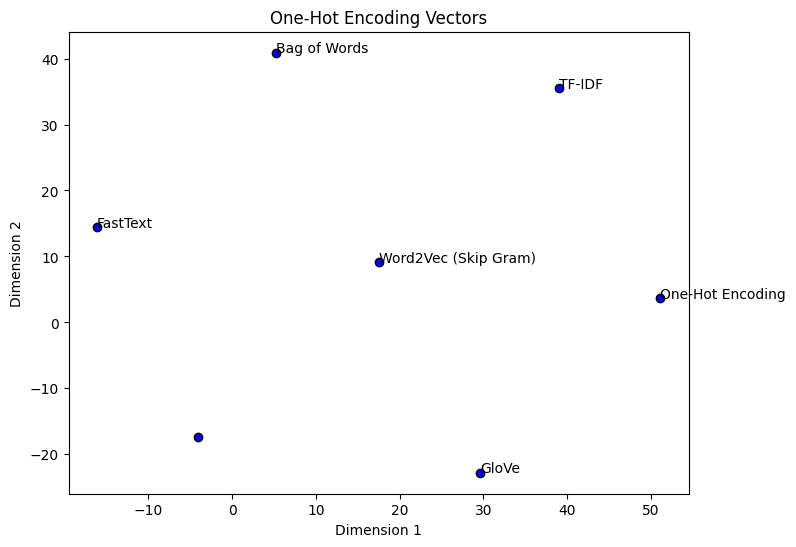

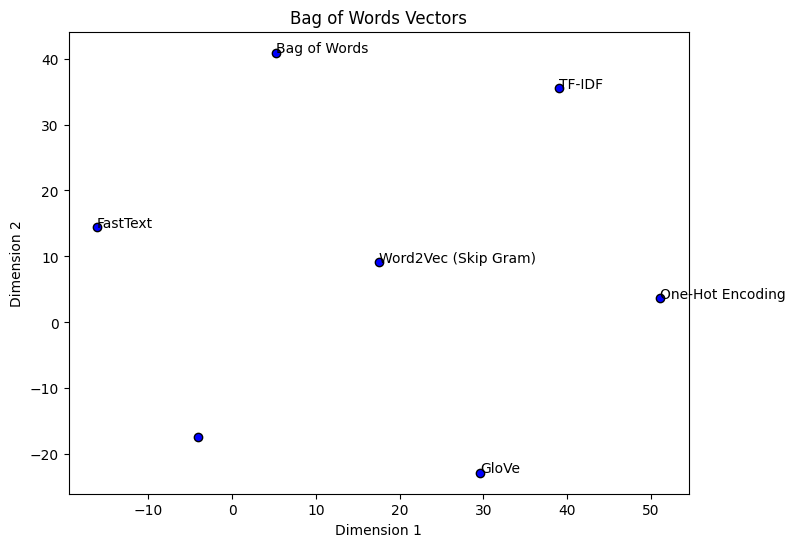

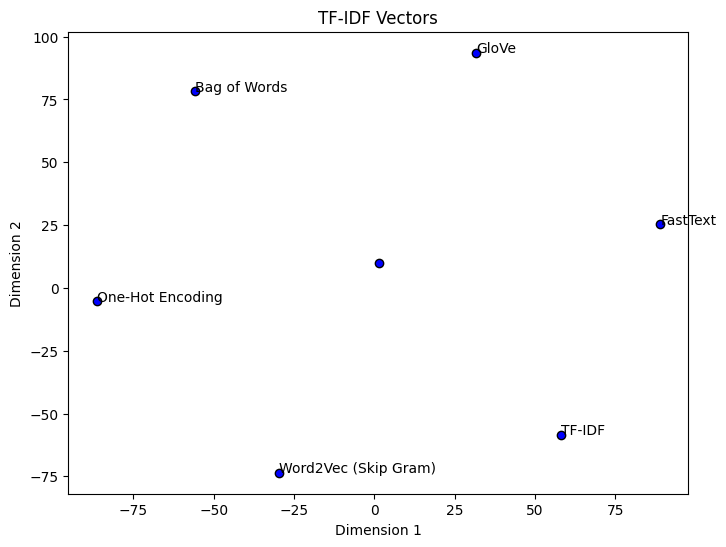

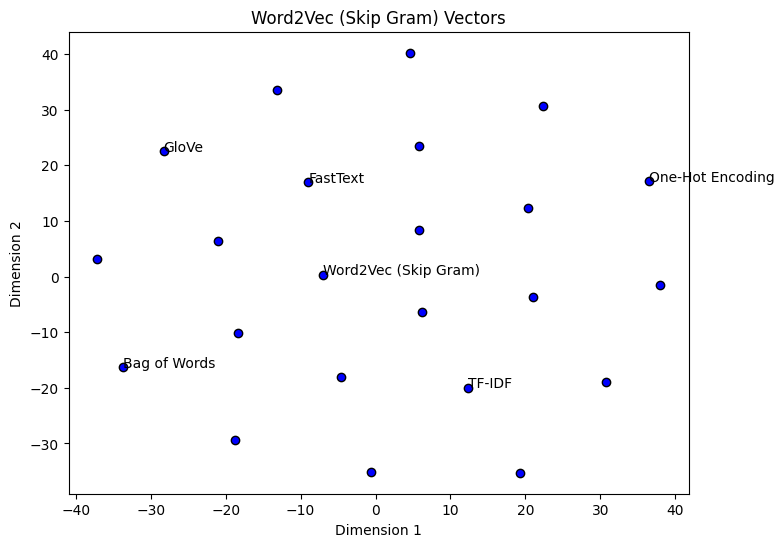

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def plot_vectors(vectors, labels, title):
    vectors = np.array(vectors)  # Convert list of vectors to numpy array
    n_samples = vectors.shape[0]
    perplexity = min(30, n_samples - 1)  # Set perplexity to a maximum of n_samples - 1
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    tsne_vectors = tsne.fit_transform(vectors)
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], c='blue', edgecolors='k')
    for i, label in enumerate(labels):
        plt.annotate(label, (tsne_vectors[i, 0], tsne_vectors[i, 1]))
    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Then use it as before
labels = ['One-Hot Encoding', 'Bag of Words', 'TF-IDF', 'Word2Vec (Skip Gram)', 'GloVe', 'FastText']
for i, vectors in enumerate(vectors_to_plot):
    plot_vectors(vectors, labels, f"{labels[i]} Vectors")
